## Football Match Result Prediction - Using Neural Network 1
### Using author's configurations
<p>
<strong>
@author Avinash Rai <br/>
@lastmodified 09/03/2021
</strong>
</p>

In [1]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn import metrics
from utilities import getTrainTestDataset, cat_3_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
X_train_epl, X_test_epl, y_train_epl, y_test_epl = getTrainTestDataset("pickles\dataset-epl.pickle")
X_train_spl, X_test_spl, y_train_spl, y_test_spl = getTrainTestDataset("pickles\dataset-spl.pickle")
print(X_train_epl.shape)
print(X_train_spl.shape)
print(X_test_epl.shape)
print(X_test_spl.shape)

(1772, 29)
(1775, 29)
(874, 29)
(875, 29)


In [3]:
X_train_epl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
1526,-0.867168,-0.149891,-0.368570,-0.491395,-1.030352,-0.160132,-0.539587,0.291926,-0.945089,-1.174424,...,3,0,0,0,0,1,0,0,0,14
157,0.588288,2.467009,1.524303,1.000785,0.743320,2.278740,-0.783542,1.573927,-1.650598,-1.584578,...,3,0,0,0,0,0,0,0,0,7
1574,0.467000,2.162718,0.375059,1.272091,1.393667,1.921832,0.131290,1.024498,-0.560267,-0.969348,...,3,0,0,0,0,0,0,0,0,4
1850,-1.412963,-1.184480,-1.450211,-1.508791,-1.148597,-1.111887,-0.112666,0.169831,-0.047170,0.056036,...,1,0,0,0,0,0,0,0,0,6
38,-0.260728,0.397832,0.645469,-0.423569,-0.498251,0.553684,-0.844531,0.780307,-1.137501,-0.149041,...,0,0,0,0,0,0,0,0,0,15


In [4]:
X_train_spl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
2020,-1.153904,-1.099911,-1.389243,-1.243118,-0.980697,-0.935257,0.067027,-0.012995,-0.048462,-0.132584,...,1,0,0,0,0,0,0,0,0,2
1143,0.694261,0.728530,1.434441,1.436632,0.923569,0.907177,-0.559609,-0.521091,0.016695,-1.185784,...,1,0,0,1,0,0,0,0,0,1
230,-0.865129,-0.528523,-0.798239,-0.262722,-0.861680,-0.578657,-0.160840,-0.295271,-0.309092,0.288696,...,0,0,0,0,0,0,0,0,0,4
1236,-0.114312,-0.299968,-1.257908,-0.720240,0.507011,-0.281490,0.978498,0.325735,0.863741,1.131256,...,3,0,0,0,0,0,0,0,0,-7
157,-0.980639,-0.757078,-0.404237,-0.197362,-1.040205,-1.113557,-0.616575,-0.577546,0.081852,0.288696,...,3,0,0,0,0,0,0,0,0,-2


## Basic Neural Network model

In [7]:
# Build model using Keras Sequential Model
input_shape = ( X_train_epl.shape[1], )
baseModel = Sequential( name="Base_Model" )
baseModel.add( Dense(41, activation='relu', input_shape=input_shape, kernel_initializer="he_normal"  ) )
baseModel.add( Dense(75, activation='relu', kernel_initializer="he_normal" ) )   
baseModel.add( Dense(3 , activation='softmax') )
baseModel.compile( optimizer=Adam(learning_rate=0.00001), 
    loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
baseModel.summary()

Model: "Base_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 41)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 75)                3150      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 228       
Total params: 4,608
Trainable params: 4,608
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
trainEpl = baseModel.fit( 
    X_train_epl, 
    y_train_epl, 
    epochs = 500, 
    validation_data = (X_test_epl,y_test_epl), 
    verbose = 1, 
    callbacks = [earlyStopping]
)

Train on 1772 samples, validate on 874 samples
Epoch 1/500
1772/1772 [==============================] - 0s 207us/sample - loss: 1.5336 - accuracy: 0.2878 - val_loss: 1.5199 - val_accuracy: 0.3009
Epoch 2/500
1772/1772 [==============================] - 0s 39us/sample - loss: 1.4766 - accuracy: 0.3064 - val_loss: 1.4682 - val_accuracy: 0.3032
Epoch 3/500
1772/1772 [==============================] - 0s 39us/sample - loss: 1.4288 - accuracy: 0.3200 - val_loss: 1.4246 - val_accuracy: 0.3227
Epoch 4/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.3885 - accuracy: 0.3386 - val_loss: 1.3880 - val_accuracy: 0.3307
Epoch 5/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.3555 - accuracy: 0.3505 - val_loss: 1.3574 - val_accuracy: 0.3375
Epoch 6/500
1772/1772 [==============================] - 0s 41us/sample - loss: 1.3281 - accuracy: 0.3567 - val_loss: 1.3326 - val_accuracy: 0.3341
Epoch 7/500
1772/1772 [==============================] - 0s 40us

1772/1772 [==============================] - 0s 46us/sample - loss: 1.1078 - accuracy: 0.4661 - val_loss: 1.1270 - val_accuracy: 0.4348
Epoch 56/500
1772/1772 [==============================] - 0s 42us/sample - loss: 1.1061 - accuracy: 0.4661 - val_loss: 1.1255 - val_accuracy: 0.4336
Epoch 57/500
1772/1772 [==============================] - 0s 41us/sample - loss: 1.1045 - accuracy: 0.4673 - val_loss: 1.1241 - val_accuracy: 0.4336
Epoch 58/500
1772/1772 [==============================] - 0s 41us/sample - loss: 1.1027 - accuracy: 0.4667 - val_loss: 1.1226 - val_accuracy: 0.4348
Epoch 59/500
1772/1772 [==============================] - 0s 39us/sample - loss: 1.1010 - accuracy: 0.4690 - val_loss: 1.1213 - val_accuracy: 0.4416
Epoch 60/500
1772/1772 [==============================] - 0s 39us/sample - loss: 1.0994 - accuracy: 0.4695 - val_loss: 1.1200 - val_accuracy: 0.4416
Epoch 61/500
1772/1772 [==============================] - 0s 42us/sample - loss: 1.0978 - accuracy: 0.4712 - val_loss: 

1772/1772 [==============================] - 0s 40us/sample - loss: 1.0401 - accuracy: 0.5023 - val_loss: 1.0733 - val_accuracy: 0.4657
Epoch 111/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0392 - accuracy: 0.5028 - val_loss: 1.0727 - val_accuracy: 0.4680
Epoch 112/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0383 - accuracy: 0.5028 - val_loss: 1.0720 - val_accuracy: 0.4680
Epoch 113/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0376 - accuracy: 0.5028 - val_loss: 1.0715 - val_accuracy: 0.4691
Epoch 114/500
1772/1772 [==============================] - 0s 41us/sample - loss: 1.0367 - accuracy: 0.5034 - val_loss: 1.0709 - val_accuracy: 0.4703
Epoch 115/500
1772/1772 [==============================] - 0s 41us/sample - loss: 1.0359 - accuracy: 0.5040 - val_loss: 1.0703 - val_accuracy: 0.4691
Epoch 116/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0350 - accuracy: 0.5045 - val_

Epoch 165/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0038 - accuracy: 0.5237 - val_loss: 1.0490 - val_accuracy: 0.4805
Epoch 166/500
1772/1772 [==============================] - 0s 39us/sample - loss: 1.0033 - accuracy: 0.5243 - val_loss: 1.0487 - val_accuracy: 0.4817
Epoch 167/500
1772/1772 [==============================] - 0s 41us/sample - loss: 1.0028 - accuracy: 0.5248 - val_loss: 1.0484 - val_accuracy: 0.4817
Epoch 168/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0023 - accuracy: 0.5248 - val_loss: 1.0481 - val_accuracy: 0.4817
Epoch 169/500
1772/1772 [==============================] - 0s 41us/sample - loss: 1.0019 - accuracy: 0.5243 - val_loss: 1.0478 - val_accuracy: 0.4817
Epoch 170/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0013 - accuracy: 0.5248 - val_loss: 1.0476 - val_accuracy: 0.4817
Epoch 171/500
1772/1772 [==============================] - 0s 40us/sample - loss: 1.0009 - accuracy:

1772/1772 [==============================] - 0s 44us/sample - loss: 0.9816 - accuracy: 0.5293 - val_loss: 1.0363 - val_accuracy: 0.4840
Epoch 220/500
1772/1772 [==============================] - 0s 39us/sample - loss: 0.9813 - accuracy: 0.5305 - val_loss: 1.0360 - val_accuracy: 0.4828
Epoch 221/500
1772/1772 [==============================] - 0s 39us/sample - loss: 0.9809 - accuracy: 0.5310 - val_loss: 1.0359 - val_accuracy: 0.4817
Epoch 222/500
1772/1772 [==============================] - 0s 42us/sample - loss: 0.9805 - accuracy: 0.5310 - val_loss: 1.0357 - val_accuracy: 0.4840
Epoch 223/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9802 - accuracy: 0.5327 - val_loss: 1.0356 - val_accuracy: 0.4828
Epoch 224/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9799 - accuracy: 0.5322 - val_loss: 1.0354 - val_accuracy: 0.4828
Epoch 225/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9795 - accuracy: 0.5322 - val_

Epoch 274/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9651 - accuracy: 0.5418 - val_loss: 1.0291 - val_accuracy: 0.4977
Epoch 275/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9648 - accuracy: 0.5418 - val_loss: 1.0289 - val_accuracy: 0.4989
Epoch 276/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9645 - accuracy: 0.5412 - val_loss: 1.0288 - val_accuracy: 0.5000
Epoch 277/500
1772/1772 [==============================] - 0s 39us/sample - loss: 0.9643 - accuracy: 0.5406 - val_loss: 1.0286 - val_accuracy: 0.5000
Epoch 278/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9640 - accuracy: 0.5406 - val_loss: 1.0287 - val_accuracy: 0.5011
Epoch 279/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9638 - accuracy: 0.5412 - val_loss: 1.0285 - val_accuracy: 0.4989
Epoch 280/500
1772/1772 [==============================] - 0s 42us/sample - loss: 0.9635 - accuracy:

1772/1772 [==============================] - 0s 42us/sample - loss: 0.9521 - accuracy: 0.5440 - val_loss: 1.0250 - val_accuracy: 0.5069
Epoch 329/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9518 - accuracy: 0.5446 - val_loss: 1.0250 - val_accuracy: 0.5069
Epoch 330/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9516 - accuracy: 0.5457 - val_loss: 1.0250 - val_accuracy: 0.5080
Epoch 331/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9514 - accuracy: 0.5446 - val_loss: 1.0248 - val_accuracy: 0.5069
Epoch 332/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9511 - accuracy: 0.5446 - val_loss: 1.0248 - val_accuracy: 0.5069
Epoch 333/500
1772/1772 [==============================] - 0s 39us/sample - loss: 0.9510 - accuracy: 0.5457 - val_loss: 1.0247 - val_accuracy: 0.5092
Epoch 334/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9507 - accuracy: 0.5446 - val_

Epoch 383/500
1772/1772 [==============================] - 0s 42us/sample - loss: 0.9411 - accuracy: 0.5514 - val_loss: 1.0224 - val_accuracy: 0.5149
Epoch 384/500
1772/1772 [==============================] - 0s 44us/sample - loss: 0.9409 - accuracy: 0.5525 - val_loss: 1.0225 - val_accuracy: 0.5160
Epoch 385/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9408 - accuracy: 0.5519 - val_loss: 1.0224 - val_accuracy: 0.5160
Epoch 386/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9406 - accuracy: 0.5536 - val_loss: 1.0224 - val_accuracy: 0.5160
Epoch 387/500
1772/1772 [==============================] - 0s 42us/sample - loss: 0.9403 - accuracy: 0.5525 - val_loss: 1.0223 - val_accuracy: 0.5160
Epoch 388/500
1772/1772 [==============================] - 0s 44us/sample - loss: 0.9401 - accuracy: 0.5514 - val_loss: 1.0222 - val_accuracy: 0.5160
Epoch 389/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9399 - accuracy:

1772/1772 [==============================] - 0s 41us/sample - loss: 0.9318 - accuracy: 0.5598 - val_loss: 1.0210 - val_accuracy: 0.5114
Epoch 438/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9315 - accuracy: 0.5587 - val_loss: 1.0209 - val_accuracy: 0.5114
Epoch 439/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9314 - accuracy: 0.5593 - val_loss: 1.0208 - val_accuracy: 0.5114
Epoch 440/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9314 - accuracy: 0.5604 - val_loss: 1.0208 - val_accuracy: 0.5114
Epoch 441/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9311 - accuracy: 0.5598 - val_loss: 1.0208 - val_accuracy: 0.5114
Epoch 442/500
1772/1772 [==============================] - 0s 41us/sample - loss: 0.9310 - accuracy: 0.5593 - val_loss: 1.0207 - val_accuracy: 0.5092
Epoch 443/500
1772/1772 [==============================] - 0s 42us/sample - loss: 0.9307 - accuracy: 0.5598 - val_

Epoch 492/500
1772/1772 [==============================] - ETA: 0s - loss: 0.9236 - accuracy: 0.56 - 0s 44us/sample - loss: 0.9231 - accuracy: 0.5643 - val_loss: 1.0198 - val_accuracy: 0.5092
Epoch 493/500
1772/1772 [==============================] - 0s 48us/sample - loss: 0.9230 - accuracy: 0.5655 - val_loss: 1.0199 - val_accuracy: 0.5103
Epoch 494/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9227 - accuracy: 0.5649 - val_loss: 1.0199 - val_accuracy: 0.5092
Epoch 495/500
1772/1772 [==============================] - 0s 39us/sample - loss: 0.9226 - accuracy: 0.5643 - val_loss: 1.0199 - val_accuracy: 0.5103
Epoch 496/500
1772/1772 [==============================] - 0s 39us/sample - loss: 0.9225 - accuracy: 0.5660 - val_loss: 1.0198 - val_accuracy: 0.5092
Epoch 497/500
1772/1772 [==============================] - 0s 40us/sample - loss: 0.9223 - accuracy: 0.5655 - val_loss: 1.0198 - val_accuracy: 0.5103
Epoch 498/500
1772/1772 [==============================] -

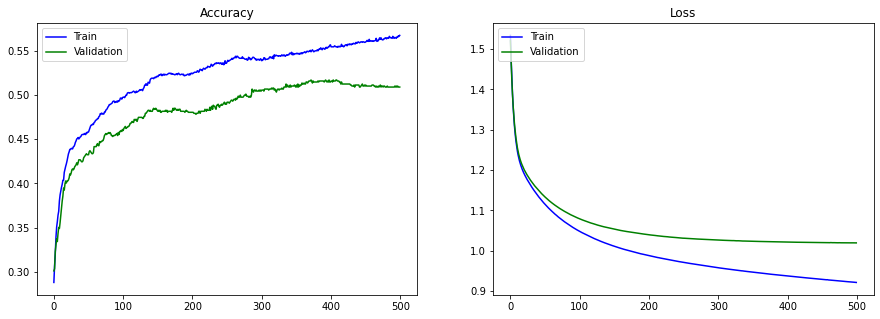

In [36]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(trainEpl.history['accuracy'], label='Train', color="blue")
plt.plot(trainEpl.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(trainEpl.history['loss'], label='Train', color="blue")
plt.plot(trainEpl.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

### Dynamic Neural Network

In [50]:
def buildNN( name, input_data, learning_rate, layers, dropout_rate ):
    
    input_shape = ( input_data.shape[1], )
    
    nn_model = Sequential( name=name )
    nn_model.add( Input(shape=input_shape ))
    # nn_model.add(Flatten())
    
    for layer in layers:
        nn_model.add( Dense(layer, activation = 'relu', kernel_initializer="he_normal") )
    nn_model.add( Dropout(dropout_rate) )

    # Output    
    nn_model.add( Dense(3 , activation='softmax') )
    nn_model.compile( optimizer=Adam(learning_rate=learning_rate), 
        loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
    nn_model.summary()
    
    return nn_model

### EPL

In [51]:
# EPL[1e-05, ‘41–75–3’, 0.5, 16, 2.8191776275634766, 0.6168224215507507]
epl_best_model = buildNN( "epl_roland-shun-41-75-3", X_train_epl, 0.00001, [41,75], 0.5 )

Model: "epl_roland-shun-41-75-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 41)                1230      
_________________________________________________________________
dense_24 (Dense)             (None, 75)                3150      
_________________________________________________________________
dropout_5 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 228       
Total params: 4,608
Trainable params: 4,608
Non-trainable params: 0
_________________________________________________________________


In [52]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
training = epl_best_model.fit( 
    X_train_epl, 
    y_train_epl, 
    batch_size = 16, 
    epochs = 500,
    validation_data = (X_test_epl,y_test_epl),
    callbacks = [ earlyStopping ]
)

Train on 1772 samples, validate on 874 samples
Epoch 1/500
1772/1772 [==============================] - 0s 248us/sample - loss: 2.4861 - accuracy: 0.4103 - val_loss: 1.4840 - val_accuracy: 0.4748
Epoch 2/500
1772/1772 [==============================] - 0s 91us/sample - loss: 2.3989 - accuracy: 0.4052 - val_loss: 1.4800 - val_accuracy: 0.4794
Epoch 3/500
1772/1772 [==============================] - 0s 90us/sample - loss: 2.4122 - accuracy: 0.4159 - val_loss: 1.4771 - val_accuracy: 0.4794
Epoch 4/500
1772/1772 [==============================] - 0s 83us/sample - loss: 2.4268 - accuracy: 0.4137 - val_loss: 1.4735 - val_accuracy: 0.4851
Epoch 5/500
1772/1772 [==============================] - 0s 91us/sample - loss: 2.3860 - accuracy: 0.3962 - val_loss: 1.4719 - val_accuracy: 0.4840
Epoch 6/500
1772/1772 [==============================] - 0s 97us/sample - loss: 2.3297 - accuracy: 0.4114 - val_loss: 1.4688 - val_accuracy: 0.4817
Epoch 7/500
1772/1772 [==============================] - 0s 77us

Epoch 56/500
1772/1772 [==============================] - 0s 84us/sample - loss: 1.6750 - accuracy: 0.4312 - val_loss: 1.2217 - val_accuracy: 0.4943
Epoch 57/500
1772/1772 [==============================] - 0s 85us/sample - loss: 1.6661 - accuracy: 0.4210 - val_loss: 1.2187 - val_accuracy: 0.4931
Epoch 58/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.6940 - accuracy: 0.4289 - val_loss: 1.2168 - val_accuracy: 0.4954
Epoch 59/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.6353 - accuracy: 0.4289 - val_loss: 1.2120 - val_accuracy: 0.4943
Epoch 60/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.5955 - accuracy: 0.4345 - val_loss: 1.2092 - val_accuracy: 0.4954
Epoch 61/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.6604 - accuracy: 0.4238 - val_loss: 1.2056 - val_accuracy: 0.4977
Epoch 62/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.6228 - accuracy: 0.4419

Epoch 111/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.3074 - accuracy: 0.4470 - val_loss: 1.0843 - val_accuracy: 0.4908
Epoch 112/500
1772/1772 [==============================] - 0s 77us/sample - loss: 1.2943 - accuracy: 0.4402 - val_loss: 1.0832 - val_accuracy: 0.4908
Epoch 113/500
1772/1772 [==============================] - 0s 87us/sample - loss: 1.2727 - accuracy: 0.4622 - val_loss: 1.0822 - val_accuracy: 0.4908
Epoch 114/500
1772/1772 [==============================] - 0s 90us/sample - loss: 1.2948 - accuracy: 0.4436 - val_loss: 1.0811 - val_accuracy: 0.4908
Epoch 115/500
1772/1772 [==============================] - 0s 92us/sample - loss: 1.2530 - accuracy: 0.4723 - val_loss: 1.0797 - val_accuracy: 0.4920
Epoch 116/500
1772/1772 [==============================] - 0s 89us/sample - loss: 1.2918 - accuracy: 0.4526 - val_loss: 1.0782 - val_accuracy: 0.4920
Epoch 117/500
1772/1772 [==============================] - 0s 87us/sample - loss: 1.2486 - accuracy:

1772/1772 [==============================] - 0s 80us/sample - loss: 1.1623 - accuracy: 0.4656 - val_loss: 1.0357 - val_accuracy: 0.4977
Epoch 166/500
1772/1772 [==============================] - 0s 77us/sample - loss: 1.1163 - accuracy: 0.4825 - val_loss: 1.0352 - val_accuracy: 0.4989
Epoch 167/500
1772/1772 [==============================] - 0s 77us/sample - loss: 1.1414 - accuracy: 0.4752 - val_loss: 1.0348 - val_accuracy: 0.4989
Epoch 168/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.1221 - accuracy: 0.4673 - val_loss: 1.0343 - val_accuracy: 0.4966
Epoch 169/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.1529 - accuracy: 0.4549 - val_loss: 1.0339 - val_accuracy: 0.4977
Epoch 170/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.1335 - accuracy: 0.4582 - val_loss: 1.0334 - val_accuracy: 0.4977
Epoch 171/500
1772/1772 [==============================] - 0s 85us/sample - loss: 1.1295 - accuracy: 0.4729 - val_

Epoch 220/500
1772/1772 [==============================] - 0s 81us/sample - loss: 1.0605 - accuracy: 0.4949 - val_loss: 1.0173 - val_accuracy: 0.5023
Epoch 221/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.0702 - accuracy: 0.4859 - val_loss: 1.0171 - val_accuracy: 0.5011
Epoch 222/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.0605 - accuracy: 0.4881 - val_loss: 1.0168 - val_accuracy: 0.5011
Epoch 223/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.0645 - accuracy: 0.4802 - val_loss: 1.0168 - val_accuracy: 0.5000
Epoch 224/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.0725 - accuracy: 0.4780 - val_loss: 1.0165 - val_accuracy: 0.5011
Epoch 225/500
1772/1772 [==============================] - 0s 88us/sample - loss: 1.0694 - accuracy: 0.4865 - val_loss: 1.0163 - val_accuracy: 0.5034
Epoch 226/500
1772/1772 [==============================] - 0s 101us/sample - loss: 1.0760 - accuracy

1772/1772 [==============================] - 0s 82us/sample - loss: 1.0227 - accuracy: 0.5023 - val_loss: 1.0106 - val_accuracy: 0.5160
Epoch 275/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.0294 - accuracy: 0.4977 - val_loss: 1.0106 - val_accuracy: 0.5149
Epoch 276/500
1772/1772 [==============================] - 0s 77us/sample - loss: 1.0282 - accuracy: 0.5124 - val_loss: 1.0105 - val_accuracy: 0.5126
Epoch 277/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.0370 - accuracy: 0.4983 - val_loss: 1.0105 - val_accuracy: 0.5126
Epoch 278/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.0203 - accuracy: 0.5045 - val_loss: 1.0104 - val_accuracy: 0.5137
Epoch 279/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.0160 - accuracy: 0.5034 - val_loss: 1.0104 - val_accuracy: 0.5149
Epoch 280/500
1772/1772 [==============================] - 0s 84us/sample - loss: 1.0182 - accuracy: 0.5079 - val_

Epoch 329/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.0181 - accuracy: 0.5090 - val_loss: 1.0066 - val_accuracy: 0.5149
Epoch 330/500
1772/1772 [==============================] - 0s 81us/sample - loss: 1.0192 - accuracy: 0.5085 - val_loss: 1.0065 - val_accuracy: 0.5149
Epoch 331/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.0033 - accuracy: 0.5158 - val_loss: 1.0065 - val_accuracy: 0.5149
Epoch 332/500
1772/1772 [==============================] - 0s 77us/sample - loss: 1.0082 - accuracy: 0.5141 - val_loss: 1.0065 - val_accuracy: 0.5137
Epoch 333/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.0177 - accuracy: 0.4944 - val_loss: 1.0064 - val_accuracy: 0.5137
Epoch 334/500
1772/1772 [==============================] - 0s 82us/sample - loss: 1.0093 - accuracy: 0.5119 - val_loss: 1.0065 - val_accuracy: 0.5137
Epoch 335/500
1772/1772 [==============================] - 0s 83us/sample - loss: 1.0003 - accuracy:

1772/1772 [==============================] - 0s 81us/sample - loss: 0.9838 - accuracy: 0.5310 - val_loss: 1.0047 - val_accuracy: 0.5137
Epoch 384/500
1772/1772 [==============================] - 0s 80us/sample - loss: 0.9840 - accuracy: 0.5254 - val_loss: 1.0048 - val_accuracy: 0.5137
Epoch 385/500
1772/1772 [==============================] - 0s 85us/sample - loss: 0.9908 - accuracy: 0.5237 - val_loss: 1.0048 - val_accuracy: 0.5126
Epoch 386/500
1772/1772 [==============================] - 0s 82us/sample - loss: 0.9869 - accuracy: 0.5361 - val_loss: 1.0047 - val_accuracy: 0.5126
Epoch 387/500
1772/1772 [==============================] - 0s 84us/sample - loss: 0.9994 - accuracy: 0.5135 - val_loss: 1.0047 - val_accuracy: 0.5126
Epoch 388/500
1772/1772 [==============================] - 0s 79us/sample - loss: 0.9947 - accuracy: 0.5164 - val_loss: 1.0046 - val_accuracy: 0.5126
Epoch 389/500
1772/1772 [==============================] - 0s 81us/sample - loss: 0.9870 - accuracy: 0.5339 - val_

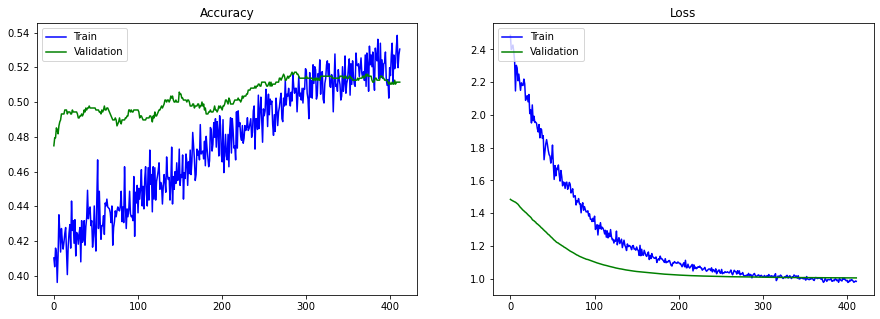

In [55]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(training.history['accuracy'], label='Train', color="blue")
plt.plot(training.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(training.history['loss'], label='Train', color="blue")
plt.plot(training.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

In [70]:
# Save model
save_path = "saved_models\\" + epl_best_model.name + ".h5"
epl_best_model.save( save_path )

### La Liga

In [56]:
# La Liga[1e-05, ‘41–10–10–10–3’, 0, 32, 0.9817492961883545, 0.5420560836791992]
spl_best_model = buildNN( "spl_roland-shun-41-10-10-10", X_train_spl, 0.00001, [41,10,10,10], 0 )

Model: "spl_roland-shun-41-10-10-10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 41)                1230      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 33        
Total params: 1,903
Trainable params: 1,903
Non-trainable params: 0
_____________________________________

In [57]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
spl_training = spl_best_model.fit( 
    X_train_spl, 
    y_train_spl,
    batch_size = 32,
    epochs = 500,
    validation_data = (X_test_spl, y_test_spl),
    callbacks = [ earlyStopping ]
)

Train on 1775 samples, validate on 875 samples
Epoch 1/500
1775/1775 [==============================] - 1s 300us/sample - loss: 1.1678 - accuracy: 0.4518 - val_loss: 1.1890 - val_accuracy: 0.4331
Epoch 2/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.1584 - accuracy: 0.4513 - val_loss: 1.1787 - val_accuracy: 0.4320
Epoch 3/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.1500 - accuracy: 0.4496 - val_loss: 1.1689 - val_accuracy: 0.4309
Epoch 4/500
1775/1775 [==============================] - 0s 43us/sample - loss: 1.1422 - accuracy: 0.4513 - val_loss: 1.1601 - val_accuracy: 0.4263
Epoch 5/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.1350 - accuracy: 0.4513 - val_loss: 1.1521 - val_accuracy: 0.4274
Epoch 6/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.1284 - accuracy: 0.4518 - val_loss: 1.1445 - val_accuracy: 0.4263
Epoch 7/500
1775/1775 [==============================] - 0s 41us

Epoch 56/500
1775/1775 [==============================] - 0s 46us/sample - loss: 1.0229 - accuracy: 0.4744 - val_loss: 1.0331 - val_accuracy: 0.4629
Epoch 57/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0222 - accuracy: 0.4744 - val_loss: 1.0326 - val_accuracy: 0.4640
Epoch 58/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0215 - accuracy: 0.4732 - val_loss: 1.0320 - val_accuracy: 0.4629
Epoch 59/500
1775/1775 [==============================] - 0s 44us/sample - loss: 1.0209 - accuracy: 0.4727 - val_loss: 1.0315 - val_accuracy: 0.4617
Epoch 60/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0203 - accuracy: 0.4732 - val_loss: 1.0310 - val_accuracy: 0.4629
Epoch 61/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0198 - accuracy: 0.4738 - val_loss: 1.0306 - val_accuracy: 0.4617
Epoch 62/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0192 - accuracy: 0.4744

Epoch 111/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0032 - accuracy: 0.4997 - val_loss: 1.0186 - val_accuracy: 0.4846
Epoch 112/500
1775/1775 [==============================] - 0s 40us/sample - loss: 1.0030 - accuracy: 0.4997 - val_loss: 1.0185 - val_accuracy: 0.4834
Epoch 113/500
1775/1775 [==============================] - 0s 44us/sample - loss: 1.0028 - accuracy: 0.4986 - val_loss: 1.0183 - val_accuracy: 0.4857
Epoch 114/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0026 - accuracy: 0.4986 - val_loss: 1.0182 - val_accuracy: 0.4846
Epoch 115/500
1775/1775 [==============================] - 0s 43us/sample - loss: 1.0024 - accuracy: 0.4986 - val_loss: 1.0181 - val_accuracy: 0.4846
Epoch 116/500
1775/1775 [==============================] - 0s 44us/sample - loss: 1.0022 - accuracy: 0.4980 - val_loss: 1.0179 - val_accuracy: 0.4846
Epoch 117/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0020 - accuracy:

1775/1775 [==============================] - 0s 43us/sample - loss: 0.9945 - accuracy: 0.5082 - val_loss: 1.0133 - val_accuracy: 0.4926
Epoch 166/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9943 - accuracy: 0.5104 - val_loss: 1.0132 - val_accuracy: 0.4926
Epoch 167/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9942 - accuracy: 0.5099 - val_loss: 1.0132 - val_accuracy: 0.4926
Epoch 168/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9941 - accuracy: 0.5104 - val_loss: 1.0131 - val_accuracy: 0.4926
Epoch 169/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9940 - accuracy: 0.5104 - val_loss: 1.0130 - val_accuracy: 0.4926
Epoch 170/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9938 - accuracy: 0.5121 - val_loss: 1.0130 - val_accuracy: 0.4914
Epoch 171/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9937 - accuracy: 0.5115 - val_

Epoch 220/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9878 - accuracy: 0.5161 - val_loss: 1.0106 - val_accuracy: 0.5097
Epoch 221/500
1775/1775 [==============================] - 0s 46us/sample - loss: 0.9877 - accuracy: 0.5172 - val_loss: 1.0106 - val_accuracy: 0.5097
Epoch 222/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9876 - accuracy: 0.5172 - val_loss: 1.0105 - val_accuracy: 0.5097
Epoch 223/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9875 - accuracy: 0.5177 - val_loss: 1.0105 - val_accuracy: 0.5097
Epoch 224/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9874 - accuracy: 0.5177 - val_loss: 1.0105 - val_accuracy: 0.5097
Epoch 225/500
1775/1775 [==============================] - 0s 52us/sample - loss: 0.9873 - accuracy: 0.5177 - val_loss: 1.0105 - val_accuracy: 0.5097
Epoch 226/500
1775/1775 [==============================] - 0s 51us/sample - loss: 0.9872 - accuracy:

1775/1775 [==============================] - 0s 42us/sample - loss: 0.9828 - accuracy: 0.5189 - val_loss: 1.0094 - val_accuracy: 0.5109
Epoch 275/500
1775/1775 [==============================] - 0s 46us/sample - loss: 0.9827 - accuracy: 0.5194 - val_loss: 1.0094 - val_accuracy: 0.5120
Epoch 276/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9826 - accuracy: 0.5206 - val_loss: 1.0094 - val_accuracy: 0.5109
Epoch 277/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9826 - accuracy: 0.5200 - val_loss: 1.0094 - val_accuracy: 0.5120
Epoch 278/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9825 - accuracy: 0.5211 - val_loss: 1.0094 - val_accuracy: 0.5120
Epoch 279/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9824 - accuracy: 0.5217 - val_loss: 1.0094 - val_accuracy: 0.5120
Epoch 280/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9823 - accuracy: 0.5217 - val_

Epoch 329/500
1775/1775 [==============================] - 0s 45us/sample - loss: 0.9785 - accuracy: 0.5301 - val_loss: 1.0087 - val_accuracy: 0.5120
Epoch 330/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9784 - accuracy: 0.5301 - val_loss: 1.0087 - val_accuracy: 0.5120
Epoch 331/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9783 - accuracy: 0.5301 - val_loss: 1.0087 - val_accuracy: 0.5120
Epoch 332/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9783 - accuracy: 0.5301 - val_loss: 1.0087 - val_accuracy: 0.5120
Epoch 333/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9782 - accuracy: 0.5301 - val_loss: 1.0087 - val_accuracy: 0.5109
Epoch 334/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9781 - accuracy: 0.5296 - val_loss: 1.0087 - val_accuracy: 0.5109
Epoch 335/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9780 - accuracy:

1775/1775 [==============================] - 0s 42us/sample - loss: 0.9749 - accuracy: 0.5341 - val_loss: 1.0082 - val_accuracy: 0.5189
Epoch 384/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9749 - accuracy: 0.5341 - val_loss: 1.0082 - val_accuracy: 0.5189
Epoch 385/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9748 - accuracy: 0.5341 - val_loss: 1.0082 - val_accuracy: 0.5189
Epoch 386/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9748 - accuracy: 0.5335 - val_loss: 1.0082 - val_accuracy: 0.5189
Epoch 387/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9747 - accuracy: 0.5335 - val_loss: 1.0082 - val_accuracy: 0.5189
Epoch 388/500
1775/1775 [==============================] - 0s 40us/sample - loss: 0.9746 - accuracy: 0.5335 - val_loss: 1.0082 - val_accuracy: 0.5189
Epoch 389/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9746 - accuracy: 0.5335 - val_

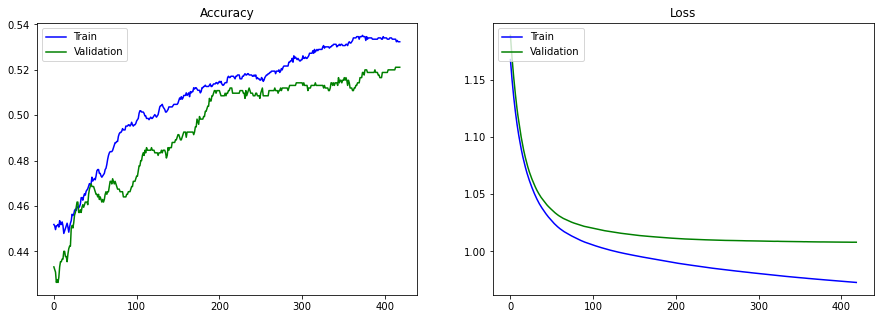

In [58]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(spl_training.history['accuracy'], label='Train', color="blue")
plt.plot(spl_training.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(spl_training.history['loss'], label='Train', color="blue")
plt.plot(spl_training.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

In [71]:
# Save model
save_path = "saved_models\\" + spl_best_model.name + ".h5"
spl_best_model.save( save_path )